In [23]:
from data_loader import load_mnist
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import rotate

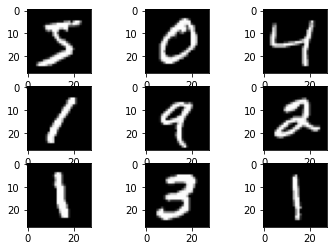

In [24]:
train, val, test = load_mnist(shuffle=False)
train_X, train_y = train

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
plt.show()

In [49]:
def translate(img, shift=10, direction='right', roll=False):
    assert direction in ['right', 'left', 'down', 'up'], 'Directions should be top|up|left|right'
    img = img.copy()
    if direction == 'right':
        right_slice = img[:, -shift:].copy()
        img[:, shift:] = img[:, :-shift]
        if roll:
            img[:,:shift] = np.fliplr(right_slice)
    if direction == 'left':
        left_slice = img[:, :shift].copy()
        img[:, :-shift] = img[:, shift:]
        if roll:
            img[:, -shift:] = left_slice
    if direction == 'down':
        down_slice = img[-shift:, :].copy()
        img[shift:, :] = img[:-shift,:]
        if roll:
            img[:shift, :] = down_slice
    if direction == 'up':
        upper_slice = img[:shift, :].copy()
        img[:-shift, :] = img[shift:, :]
        if roll:
            img[-shift:,:] = upper_slice
    return img

def image_cropping(img, crop_size):
    assert crop_size[0] <= img.shape[0], "Crop width size should be less than image width size"
    assert crop_size[1] <= img.shape[1], "Crop height size should be less than image height size"
    w, h = img.shape[:2]
    x, y = np.random.randint(w-crop_size[0]), np.random.randint(h-crop_size[1]) 
    img = img[y:y+crop_size[0], x:x+crop_size[1]]
    img
    return img

def rotate_img(img, angle, bg_patch=(5,5)):
    assert len(img.shape) <= 3, "Incorrect image shape"
    rgb = len(img.shape) == 3
    if rgb:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1], :], axis=(0,1))
    else:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1]])
    img = rotate(img, angle, reshape=False)
    mask = [img <= 0, np.any(img <= 0, axis=-1)][rgb]
    img[mask] = bg_color
    return img

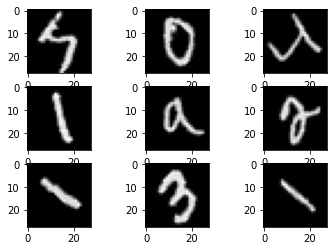

In [50]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    image_i = rotate_img(np.array(train_X[i]), angle=45)
    plt.imshow(image_i, cmap=plt.get_cmap('gray'))
plt.show()

(20, 20, 1)
(20, 20, 1)
(20, 20, 1)
(20, 20, 1)
(20, 20, 1)
(20, 20, 1)
(20, 20, 1)
(20, 20, 1)
(20, 20, 1)


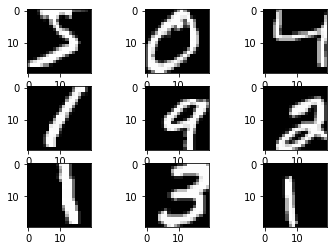

In [51]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    image_i = image_cropping(np.array(train_X[i]), (20, 20))
    plt.imshow(image_i, cmap=plt.get_cmap('gray'))
plt.show()

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


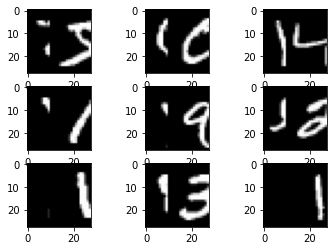

In [54]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    image_i = translate(np.array(train_X[i]), roll=True)
    plt.imshow(image_i, cmap=plt.get_cmap('gray'))
plt.show()

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


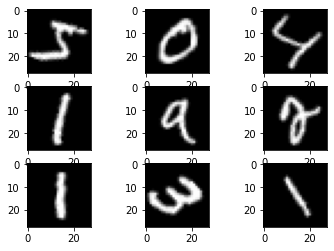

In [64]:
import imgaug as ia
from imgaug import augmenters as iaa

ia_rotate = iaa.Affine(rotate=(-50, 50))
for i in range(9):
    plt.subplot(330 + 1 + i)
    image_i = ia_rotate(image=np.array(train_X[i]))
    plt.imshow(image_i, cmap=plt.get_cmap('gray'))
plt.show()

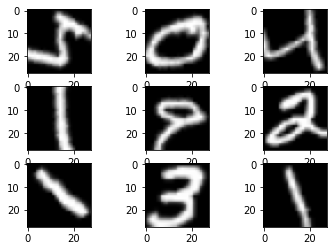

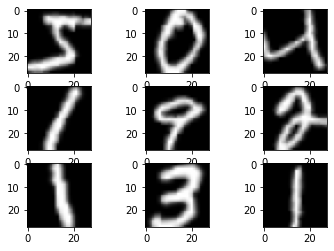

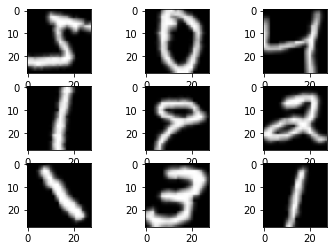

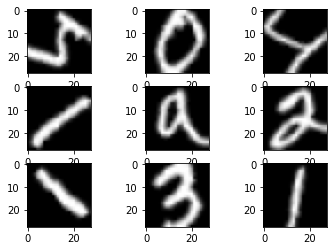

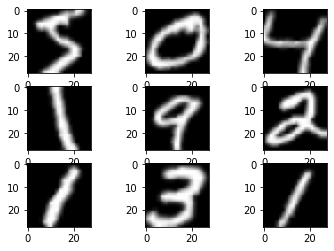

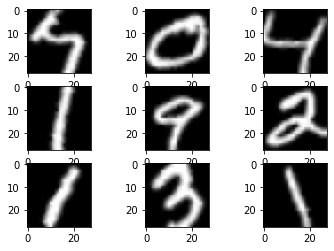

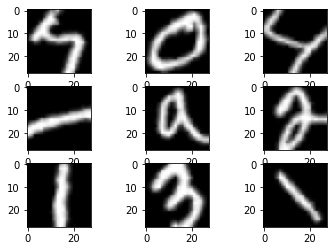

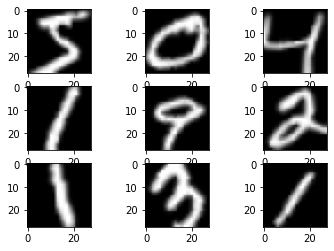

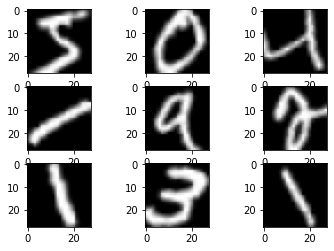

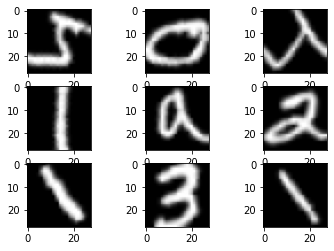

In [73]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-45, 45)),
    iaa.Crop(percent=(0.15, 0.15))
])

for _ in range(10):
    for i in range(9):
        plt.subplot(330 + 1 + i)
        image_i = seq(image=np.array(train_X[i]))
        plt.imshow(image_i, cmap=plt.get_cmap('gray'))
    plt.show()
    plt.close()

(10, 28, 28, 1)


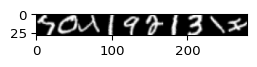

In [75]:
aug_images = seq(images=np.array(train_X[:10]))
print(aug_images.shape)
ia.imshow(np.hstack(aug_images))